# Pymaceuticals Inc. Final Analysis
---

### Observations and inferences

- The Drug Treatment mouse numbers are as follows; Capomulin 230, Ramicane 228, Ketapril 188, Naftisol 186, Zoniferol 182,
  Placebo 181, Stelasyn 181, Infubinol 178, Ceftamin 178, Propriva 148 (pls. see 
  Number_of_Mouse_per_Treatment_summary_statistics_pandas.jpg in Output folder)
  
- The Distribution Percentage of Female and Male mouses are %49 to %51 respectively (pls. see
  subject_distribution_gender_pie_pandas.jpg in Output folder)
  
- More investment to Infubinol treatment is unnecessary due to increasing tumor volumes during timepoint (pls. see 
  Tumor_Volume_vs_Timepoint_for_Mouse_A203_treated_with_Infubinol.jpg in Output folder)
  
- Capomulin and Remicane treatments showed better performance in reduction of tumor volume compared to 2 other treatments (pls.   see Final_Tumor_Volume_by_Treatment_Group.jpg in Output folder)

- The Correlation for mouse weight and average observed tumor volume for the entire Capomulin regimen is: 0.84, which means
  more the subject mouse weught increase, more the tumor volume increase due to positive correlation 

In [2]:
# Dependencies and Setup
#In Python, both variance and standard deviation are calculated by using the NumPy module
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#outer also gets intersecting, left and right
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Display Mouse_metadata
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# Display Study_results 
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
combined_data.info()
#same number of values in all columns with correct types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
combined_data.describe()
#description of the combined data

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [7]:
# Checking the number of mice
#nunique counts the data

number_of_mouse = combined_data["Mouse ID"].nunique()
number_of_mouse

#also possible with;
#number_of_mouse = combined_data["Mouse ID"].value_counts()

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
#unique when we want actual values
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID
#filtering data to duplicate mouse

duplicate_mouse_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#using != for 'not equal'

clean_combined_data = combined_data[combined_data["Mouse ID"]!="g989"]
clean_combined_data

#is it in duplicate mouse id or not, false or not
#clean_combined_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_id)==False]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame
cleaned_number_of_mouse = len(clean_combined_data["Mouse ID"].unique())
print(f"Number of mouse after removing duplicate is: {cleaned_number_of_mouse}")

#also possible;
#cleaned_number_of_mouse = len(clean_combined_data["Mouse ID"].value_counts())

Number of mouse after removing duplicate is: 248


## Summary Statistics

In [12]:
#cleaned_number_of_mouse.describe() can we have a look with describe here??????????????
clean_combined_data = clean_combined_data.rename(columns={"Drug Regimen":"Drug"})
clean_combined_data = clean_combined_data.rename(columns={"Sex":"Gender"})
clean_combined_data = clean_combined_data.rename(columns={"Age_months":"Age (months)"})
clean_combined_data = clean_combined_data.rename(columns={"Weight(g)":"Weight (grams)"})
clean_combined_data = clean_combined_data.rename(columns={"Timepoint":"Timepoint (days)"})
clean_combined_data = clean_combined_data.rename(columns={"Tumor Volume (mm3)":"Tumor Vol (mm3)"})
clean_combined_data = clean_combined_data.drop(columns={"Metastatic Sites"})
clean_combined_data

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000
1,k403,Ramicane,Male,21,16,5,38.825898
2,k403,Ramicane,Male,21,16,10,35.014271
3,k403,Ramicane,Male,21,16,15,34.223992
4,k403,Ramicane,Male,21,16,20,32.997729
...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652
1889,z969,Naftisol,Male,9,30,30,65.841013
1890,z969,Naftisol,Male,9,30,35,69.176246
1891,z969,Naftisol,Male,9,30,40,70.314904


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).mean()
median = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).median()
variance = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).var()
standard_deviation = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).std()
sem = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Tumor Vol Mean (mm3)":mean, "Tumor Vol Median (mm3)":median,
                                  "Tumor Vol Variance (mm3)":variance, "Tumor Vol Std. Dev. (mm3)": standard_deviation,
                                   "Tumor Vol Std. Error (mm3)":sem}) 
summary_statistics

,Tumor Vol Mean (mm3),Tumor Vol Median (mm3),Tumor Vol Variance (mm3),Tumor Vol Std. Dev. (mm3),Tumor Vol Std. Error (mm3)
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
#saving to Output as csv
summary_statistics.to_csv("Output/summary_statistics.csv")

In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_statistics = clean_combined_data.groupby(["Drug"])[["Tumor Vol (mm3)"]].agg(["mean", "median", "var", 
                                                                                         "std", "sem"])

agg_summary_statistics = agg_summary_statistics.rename(columns={"mean":"Tumor Vol Mean (mm3)"})
agg_summary_statistics = agg_summary_statistics.rename(columns={"median":"Tumor Vol Median (mm3)"})
agg_summary_statistics = agg_summary_statistics.rename(columns={"var":"Tumor Vol Variance (mm3)"})
agg_summary_statistics = agg_summary_statistics.rename(columns={"std":"Tumor Vol Std. Dev. (mm3)"})
agg_summary_statistics = agg_summary_statistics.rename(columns={"sem":"Tumor Vol Std. Error (mm3)"})

agg_summary_statistics 

Tumor Vol (mm3)                         \
          Tumor Vol Mean (mm3) Tumor Vol Median (mm3)   
Drug                                                    
Capomulin            40.675741              41.557809   
Ceftamin             52.591172              51.776157   
Infubinol            52.884795              51.820584   
Ketapril             55.235638              53.698743   
Naftisol             54.331565              52.509285   
Placebo              54.033581              52.288934   
Propriva             52.320930              50.446266   
Ramicane             40.216745              40.673236   
Stelasyn             54.233149              52.431737   
Zoniferol            53.236507              51.818479   

                                                              \
          Tumor Vol Variance (mm3) Tumor Vol Std. Dev. (mm3)   
Drug                                                           
Capomulin                24.947764                  4.994774   
Ceftamin                 39.290177                  6.268188   
Infubinol                43.128684                  6.567243   
Ketapril                 68.553577                  8.279709   
Naftisol                 66.173479                  8.134708   
Placebo                  61.168083                  7.821003   
Propriva                 43.852013                  6.622085   
Ramicane                 23.486704                  4.846308   
Stelasyn                 59.450562                  7.710419   
Zoniferol                48.533355                  6.966589   

                                      
          Tumor Vol Std. Error (mm3)  
Drug                                  
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466  
Placebo                     0.581331  
Propriva                    0.544332  
Ramicane                    0.320955  
Stelasyn                    0.573111  
Zoniferol                   0.516398

In [17]:
#saving to Output as csv
agg_summary_statistics.to_csv("Output/agg_summary_statistics.csv")

## Bar and Pie Charts

In [18]:
#creating a group series for Drug column to later count the timepoint rows
mouse_count = clean_combined_data["Drug"].value_counts()
mouse_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug, dtype: int64

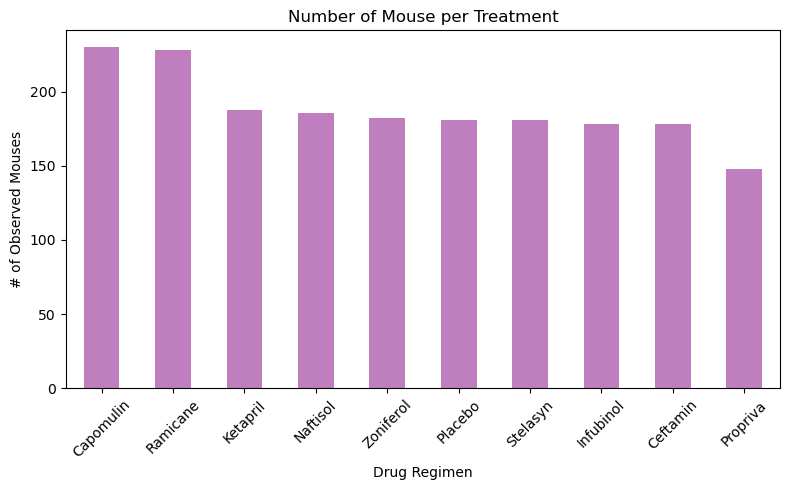

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = mouse_count.plot.bar(color="purple", alpha=0.5, figsize=(8,5))

#giving names and title to bar plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouses")
plt.title("Number of Mouse per Treatment")
plt.xticks(rotation=45)
plt.tight_layout()

#saving to Output folder as jpg
plt.savefig("Output/Number_of_Mouse_per_Treatment_summary_statistics_pandas.jpg")
plt.show()

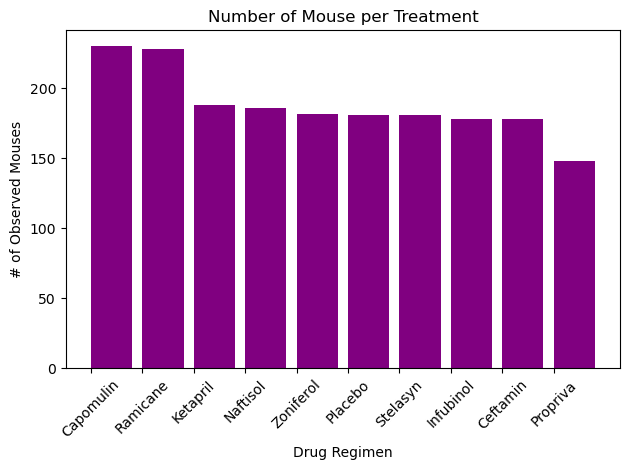

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#index left value of above mouse_count which are drugs in this case
x_axis = mouse_count.index.values 
y_axis = mouse_count.values

plot_pyplot = plt.bar(x_axis, y_axis, color="purple", alpha=1, align="edge")

#giving names and title to bar plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouses")
plt.title("Number of Mouse per Treatment")
plt.xticks(rotation=45)
plt.tight_layout()

#saving to Output folder as jpg
plt.savefig("Output/Number_of_Mouse_per_Treatment_summary_statistics_pyplot.jpg")
plt.show()

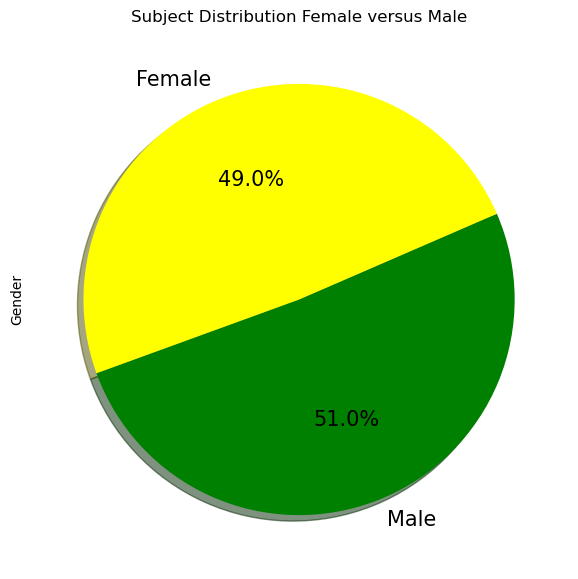

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_combined_data_gender = clean_combined_data["Gender"].value_counts()

pies  = ["Male", "Female"]
colors = ["green", "yellow"]

plt.title("Subject Distribution Female versus Male")
pie_pandas = clean_combined_data_gender.plot.pie(labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200, 
                                                fontsize=15, figsize=(7,7))

#saving to Output folder as jpg
plt.savefig("Output/subject_distribution_gender_pie_pandas.jpg")
plt.show()

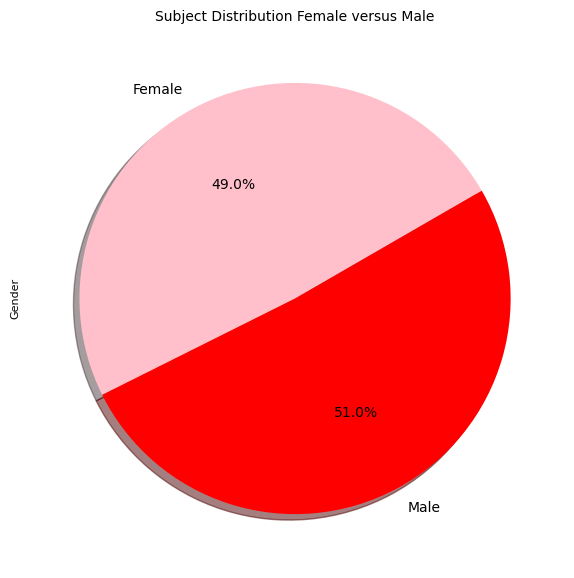

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count = [clean_combined_data_gender["Female"], clean_combined_data_gender["Male"]]
pies  = ["Female", "Male"]
colors = ["pink", "red"]
plt.figure(figsize=(7,7))
pie_pyplot = plt.pie(count, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30)
plt.title("Subject Distribution Female versus Male", fontsize=10)
plt.ylabel("Gender", fontsize=8)

#saving to Output folder as jpg
plt.savefig("Output/subject_distribution_gender_pie_pyplot.jpg")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
clean_combined_data

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000
1,k403,Ramicane,Male,21,16,5,38.825898
2,k403,Ramicane,Male,21,16,10,35.014271
3,k403,Ramicane,Male,21,16,15,34.223992
4,k403,Ramicane,Male,21,16,20,32.997729
...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652
1889,z969,Naftisol,Male,9,30,30,65.841013
1890,z969,Naftisol,Male,9,30,35,69.176246
1891,z969,Naftisol,Male,9,30,40,70.314904


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_combined_data.loc[clean_combined_data["Drug"] == "Capomulin", :] 
Ramicane_df = clean_combined_data.loc[clean_combined_data["Drug"] == "Ramicane", :]
Infubinol_df = clean_combined_data.loc[clean_combined_data["Drug"] == "Infubinol", :]
Ceftamin_df = clean_combined_data.loc[clean_combined_data["Drug"] == "Ceftamin", :]

#checking drug regimens
Capomulin_df.head(15)
#Ramicane_df.head(25)
#Infubinol_df.head(25)
#Ceftamin_df.head(25)

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
10,s185,Capomulin,Female,3,17,0,45.000000
11,s185,Capomulin,Female,3,17,5,43.878496
12,s185,Capomulin,Female,3,17,10,37.614948
13,s185,Capomulin,Female,3,17,15,38.177232
14,s185,Capomulin,Female,3,17,20,36.866876
15,s185,Capomulin,Female,3,17,25,33.949940
16,s185,Capomulin,Female,3,17,30,32.959671
17,s185,Capomulin,Female,3,17,35,28.328531
18,s185,Capomulin,Female,3,17,40,25.472143
19,s185,Capomulin,Female,3,17,45,23.343598


In [25]:
# Start by getting the last (greatest) timepoint for each mouse
#max gives the most recent
#min gives the oldest timepoint
last_timepoint = clean_combined_data.groupby("Mouse ID").max()["Timepoint (days)"]
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df

,Timepoint (days)
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [26]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_tumor_volume_df = pd.merge(last_timepoint_df, clean_combined_data, on = ["Mouse ID", "Timepoint (days)"])
last_tumor_volume_df

,Mouse ID,Timepoint (days),Drug,Gender,Age (months),Weight (g),Tumor Vol (mm3)
0,a203,45,Infubinol,Female,20,23,67.973419
1,a251,45,Infubinol,Female,21,25,65.525743
2,a262,45,Placebo,Female,17,29,70.717621
3,a275,45,Ceftamin,Female,20,28,62.999356
4,a366,30,Stelasyn,Female,16,29,63.440686
...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661
244,z578,45,Ramicane,Male,11,16,30.638696
245,z581,45,Infubinol,Female,24,25,62.754451
246,z795,45,Naftisol,Female,13,29,65.741070


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

#-1 gives from first to last event, last item allows to start from 0 if when using range

for i in range(len(last_tumor_volume_df)-1):
    if last_tumor_volume_df.loc[i, "Drug"] == "Capomulin":
        tumor_vol_cap.append(last_tumor_volume_df.loc[i, "Tumor Vol (mm3)"])
    if last_tumor_volume_df.loc[i, "Drug"] == "Ramicane":
        tumor_vol_ram.append(last_tumor_volume_df.loc[i, "Tumor Vol (mm3)"])
    if last_tumor_volume_df.loc[i, "Drug"] == "Infubinol":
        tumor_vol_inf.append(last_tumor_volume_df.loc[i, "Tumor Vol (mm3)"])
    if last_tumor_volume_df.loc[i, "Drug"] == "Ceftamin":
        tumor_vol_cef.append(last_tumor_volume_df.loc[i, "Tumor Vol (mm3)"])

tumor_vol_list = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes, add subset, 
    # Determine outliers using upper and lower bounds
outlier_list = []
for i in range(len(tumor_vol_list)):
    quartiles = pd.Series(tumor_vol_list[i]).quantile([0.25,0.5,0.75]).round(3)
    lowerq = quartiles[0.25].round(3)
    upperq = quartiles[0.75].round(3)
    iqr = round(upperq-lowerq, 3)
    
    print(f"\n{treatment[i]}:")
    print(f"Lower Quartile of Tumor Vol is: {lowerq}")
    print(f"Upper  Quartile of Tumor Vol is: {upperq}")
    print(f"InterQuartile of Tumor Vol is: {iqr}")
    print(f"The Median of Tumor Vol is: {quartiles[0.5]}")
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)

    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")
    print(f"<><><><><><><><><><><><><><><><><><><><><>") 


Capomulin:
Lower Quartile of Tumor Vol is: 32.377
Upper  Quartile of Tumor Vol is: 40.159
InterQuartile of Tumor Vol is: 7.782
The Median of Tumor Vol is: 38.125
Values below 20.704 could be outliers
Values above 51.832 could be outliers
<><><><><><><><><><><><><><><><><><><><><>

Ramicane:
Lower Quartile of Tumor Vol is: 31.56
Upper  Quartile of Tumor Vol is: 40.659
InterQuartile of Tumor Vol is: 9.099
The Median of Tumor Vol is: 36.562
Values below 17.911 could be outliers
Values above 54.308 could be outliers
<><><><><><><><><><><><><><><><><><><><><>

Infubinol:
Lower Quartile of Tumor Vol is: 54.049
Upper  Quartile of Tumor Vol is: 65.526
InterQuartile of Tumor Vol is: 11.477
The Median of Tumor Vol is: 60.165
Values below 36.834 could be outliers
Values above 82.742 could be outliers
<><><><><><><><><><><><><><><><><><><><><>

Ceftamin:
Lower Quartile of Tumor Vol is: 48.722
Upper  Quartile of Tumor Vol is: 64.3
InterQuartile of Tumor Vol is: 15.578
The Median of Tumor Vol is: 5

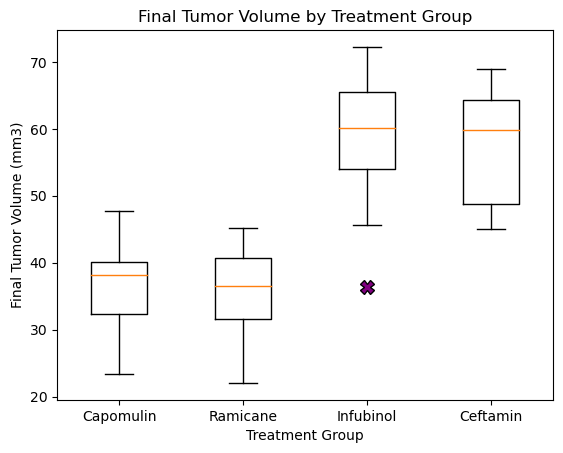

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# taking four treatments (drug regimens) into consideration
boxplot_outliers = dict(marker="X", markerfacecolor="purple", markersize=10)
plt.boxplot(tumor_vol_list, flierprops=boxplot_outliers)

#adding labels
plt.title("Final Tumor Volume by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

#saving to Output folder as jpg
plt.savefig("Output/Final_Tumor_Volume_by_Treatment_Group.jpg")
plt.show()

## Line and Scatter Plots

In [29]:
# decided to analyze tumor a203, treated with Infubinol
# Infubinol has the highest median tumor volume that has been increased during 45 days within all 4 treatments!
# this decision is given to clearly show the effects of Infubinol drug treatment to Pymaceuticals Inc management 
# also to allow the management to proceed with investment to Infubinol drug treatment or not 
last_tumor_volume_df.head(1)

,Mouse ID,Timepoint (days),Drug,Gender,Age (months),Weight (g),Tumor Vol (mm3)
0,a203,45,Infubinol,Female,20,23,67.973419


In [30]:
tumor_a203 = clean_combined_data.loc[clean_combined_data["Mouse ID"] == "a203"]
tumor_a203

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
454,a203,Infubinol,Female,20,23,0,45.000000
455,a203,Infubinol,Female,20,23,5,48.508468
456,a203,Infubinol,Female,20,23,10,51.852437
457,a203,Infubinol,Female,20,23,15,52.777870
458,a203,Infubinol,Female,20,23,20,55.173336
459,a203,Infubinol,Female,20,23,25,56.793208
460,a203,Infubinol,Female,20,23,30,59.523197
461,a203,Infubinol,Female,20,23,35,61.931650
462,a203,Infubinol,Female,20,23,40,63.593490
463,a203,Infubinol,Female,20,23,45,67.973419


In [31]:
#saving to Output as csv
tumor_a203.to_csv("Output/tumor_a203.csv")

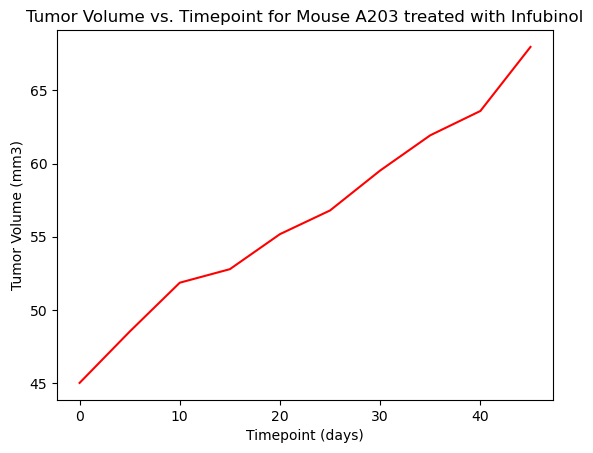

In [32]:
# working on Tumor A203 treated with Infubinol 
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Infubinol
plt.plot(tumor_a203["Timepoint (days)"], tumor_a203["Tumor Vol (mm3)"], color = "red")
plt.title("Tumor Volume vs. Timepoint for Mouse A203 treated with Infubinol", fontsize = 12)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Output/Tumor_Volume_vs_Timepoint_for_Mouse_A203_treated_with_Infubinol.jpg")
plt.show()

In [33]:
last_tumor_volume_df.head(20)

,Mouse ID,Timepoint (days),Drug,Gender,Age (months),Weight (g),Tumor Vol (mm3)
0,a203,45,Infubinol,Female,20,23,67.973419
1,a251,45,Infubinol,Female,21,25,65.525743
2,a262,45,Placebo,Female,17,29,70.717621
3,a275,45,Ceftamin,Female,20,28,62.999356
4,a366,30,Stelasyn,Female,16,29,63.440686
5,a401,45,Zoniferol,Female,8,25,66.794156
6,a411,45,Ramicane,Male,3,22,38.407618
7,a444,45,Ramicane,Female,10,25,43.047543
8,a457,10,Ketapril,Female,11,30,49.783419
9,a492,45,Stelasyn,Male,20,25,60.122011


In [34]:
# also will work on Tumor B128 treated with Capomulin
tumor_b128 = clean_combined_data.loc[clean_combined_data["Mouse ID"] == "b128"]
tumor_b128

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
300,b128,Capomulin,Female,9,22,0,45.000000
301,b128,Capomulin,Female,9,22,5,45.651331
302,b128,Capomulin,Female,9,22,10,43.270852
303,b128,Capomulin,Female,9,22,15,43.784893
304,b128,Capomulin,Female,9,22,20,42.731552
305,b128,Capomulin,Female,9,22,25,43.262145
306,b128,Capomulin,Female,9,22,30,40.605335
307,b128,Capomulin,Female,9,22,35,37.967644
308,b128,Capomulin,Female,9,22,40,38.379726
309,b128,Capomulin,Female,9,22,45,38.982878


In [35]:
#saving to Output as csv
tumor_b128.to_csv("Output/tumor_b128.csv")

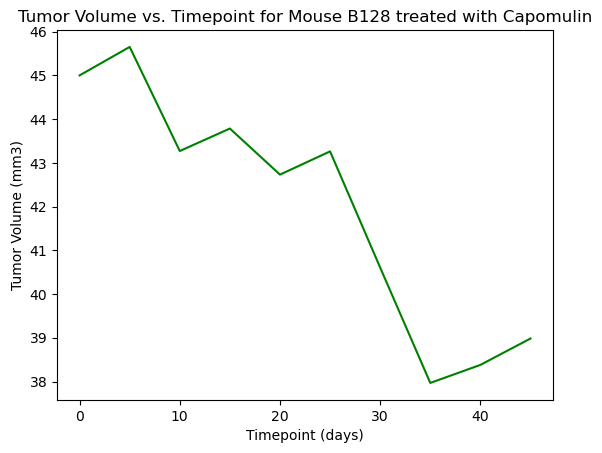

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(tumor_b128["Timepoint (days)"], tumor_b128["Tumor Vol (mm3)"], color = "green")
plt.title("Tumor Volume vs. Timepoint for Mouse B128 treated with Capomulin", fontsize = 12)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Output/Tumor_Volume_vs_Timepoint_for_Mouse_B128_treated_with_Capomulin.jpg")
plt.show()

In [37]:
clean_combined_data

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000
1,k403,Ramicane,Male,21,16,5,38.825898
2,k403,Ramicane,Male,21,16,10,35.014271
3,k403,Ramicane,Male,21,16,15,34.223992
4,k403,Ramicane,Male,21,16,20,32.997729
...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652
1889,z969,Naftisol,Male,9,30,30,65.841013
1890,z969,Naftisol,Male,9,30,35,69.176246
1891,z969,Naftisol,Male,9,30,40,70.314904


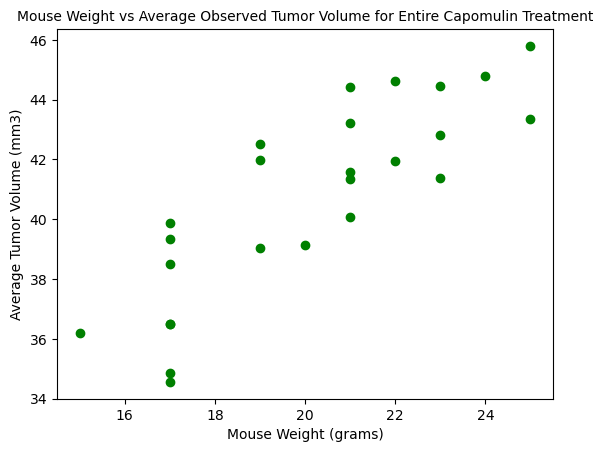

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_combined_data[clean_combined_data["Drug"] == "Capomulin"].groupby("Mouse ID")
ave_tumor_vol_capomulin = capomulin_df["Tumor Vol (mm3)"].mean()
Mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(Mouse_weight, ave_tumor_vol_capomulin, color= "green")
plt.title("Mouse Weight vs Average Observed Tumor Volume for Entire Capomulin Treatment", fontsize = 10)
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("Output/Mouse_weight_vs_the_average_observed_tumor_volume_for_the_entire_Capomulin_treatment.jpg")
plt.show()


## Correlation and Regression

In [49]:
# Calculate the correlation coefficient  
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Mouse_weight = Mouse_weight.astype(float)
correlation = st.pearsonr(Mouse_weight, ave_tumor_vol_capomulin)
print(f"Correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen is: {round(correlation[0], 2)}.")

Correlation for mouse weight and average observed tumor volume for the entire Capomulin regimen is: 0.84.


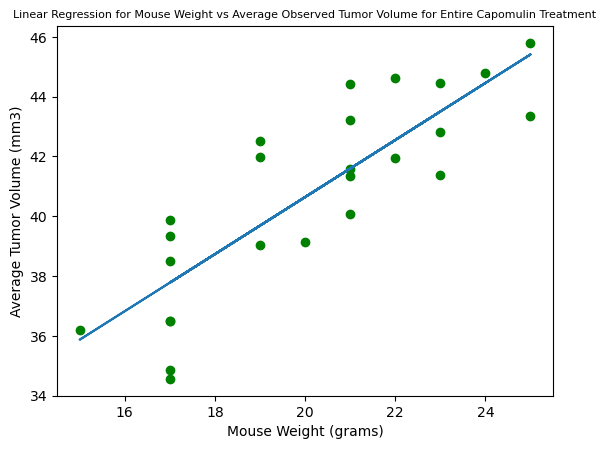

In [59]:
#and a linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Mouse_weight, ave_tumor_vol_capomulin)
regress = Mouse_weight*slope + intercept
capomulin_df = clean_combined_data[clean_combined_data["Drug"] == "Capomulin"].groupby("Mouse ID")
ave_tumor_vol_capomulin = capomulin_df["Tumor Vol (mm3)"].mean()
plt.scatter((capomulin_df["Weight (g)"].unique()), ave_tumor_vol_capomulin, color= "green")
plt.plot(Mouse_weight, regress)

plt.title("Linear Regression for Mouse Weight vs Average Observed Tumor Volume for Entire Capomulin Treatment", fontsize = 8)
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig("Output/Linear_Regression_for_Mouse_weight_vs_the_average_observed_tumor_volume_for_the_entire_Capomulin_treatment.jpg")

plt.show()